### All cleaning and enrichment steps  as below:

##### Data Transformation (Phase 1)

1. Inspecting the 3 original datasets downloaded by using the Yahoo Finance API.

2. Combining the 3 datasets into one main dataset that is considered as **source** data.

3. Cleaning the **dirty** data that was made changes manually.

4. Combine the **stage** data with the data provided by student A to make a **master** file.

##### Importing the packages and datasets

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the orginal datasets into dataframes
df_sp500    =pd.read_csv("../Tran_Dao_Data/Tran_Dao_StudC_data_sp500_src.csv")
df_non_sp500=pd.read_csv("../Tran_Dao_Data/Tran_Dao_StudC_data_non_sp500_src.csv")
df_spy      =pd.read_csv("../Tran_Dao_Data/Tran_Dao_StudC_data_spy_src.csv")

### 1. Inspecting the datasets

Get an first overview about the data ... with 'head()', 'info()' and 'describe()':

In [3]:
df_sp500.head()

,Unnamed: 0,Unnamed: 1,Date,Open,High,Low,Close,Adj Close,Volume
0,MMM,0,2020-12-30,173.880005,174.919998,173.380005,174.110001,168.753479,1419100
1,MMM,1,2020-12-31,174.119995,174.869995,173.179993,174.789993,169.412537,1841300
2,MMM,2,2021-01-04,175.000000,176.199997,170.550003,171.869995,166.582382,2996200
3,MMM,3,2021-01-05,172.009995,173.250000,170.649994,171.580002,166.301315,2295300
4,MMM,4,2021-01-06,172.720001,175.570007,172.039993,174.190002,168.831024,3346400


In [4]:
df_non_sp500.head()

,Unnamed: 0,Unnamed: 1,Date,Open,High,Low,Close,Adj Close,Volume
0,LQD,0,2020-12-30,137.889999,138.110001,137.789993,138.100006,136.487366,5343100.0
1,LQD,1,2020-12-31,138.039993,138.220001,137.960007,138.130005,136.517029,6932300.0
2,LQD,2,2021-01-04,137.889999,137.889999,137.380005,137.429993,135.825195,14891400.0
3,LQD,3,2021-01-05,137.059998,137.059998,136.550003,136.990005,135.390350,16294400.0
4,LQD,4,2021-01-06,135.779999,135.979996,135.399994,135.880005,134.293289,19136500.0


In [5]:
df_spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-30,372.339996,373.100006,371.570007,371.989990,369.566559,49455300
1,2020-12-31,371.779999,374.660004,371.230011,373.880005,371.444244,78520700
2,2021-01-04,375.309998,375.450012,364.820007,368.790009,366.387390,110210800
3,2021-01-05,368.100006,372.500000,368.049988,371.329987,368.910828,66426200
4,2021-01-06,369.709991,376.980011,369.119995,373.549988,371.116394,107997700


Check whether the column names are the same in the different files:

In [6]:
df_sp500.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Date', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume'],
      dtype='object')

In [7]:
df_non_sp500.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Date', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume'],
      dtype='object')

In [8]:
df_spy.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In order to concatenate the 3 dataframes together, we have to make sure that they have the same structures , there are some steps need to be done:
- Rename column "Unnamed: 0" into "Ticker" in "df_sp500" 
- Drop column "Unnamed: 1" in "df_sp500"


- Rename column "Unnamed: 0" into "Ticker" in "df_non_sp500" 
- Drop column "Unnamed: 1" in "df_non_sp500"


- Creat a new column named "Ticker" in "df_spy" with values "SPY" (because all data records are about SPY)

In [9]:
# Rename column "Unnamed: 0" into "Ticker" in "df_sp500" 
df_sp500.rename(columns = {"Unnamed: 0":"Ticker"}, inplace = True)

In [10]:
# Delete the unnecessary columns
del df_sp500["Unnamed: 1"]

In [11]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106462 entries, 0 to 106461
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Ticker     106462 non-null  object 
 1   Date       106462 non-null  object 
 2   Open       106462 non-null  float64
 3   High       106462 non-null  float64
 4   Low        106462 non-null  float64
 5   Close      106462 non-null  float64
 6   Adj Close  106462 non-null  float64
 7   Volume     106462 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 6.5+ MB


In [12]:
# Rename column "Unnamed: 0" into "Ticker" in "df_non_sp500" 
df_non_sp500.rename(columns = {"Unnamed: 0":"Ticker"}, inplace = True)

In [13]:
# Delete the unnecessary columns
del df_non_sp500["Unnamed: 1"]

In [14]:
df_non_sp500.sample(3)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
40767,PANW,2021-01-13,371.799988,372.450012,362.339996,365.799988,365.799988,1244500.0
71949,DRIV,2021-01-22,27.525000,27.820000,27.414000,27.760000,27.704048,2216900.0
19116,LNG,2021-06-16,87.769997,88.650002,86.919998,88.610001,88.332413,1209600.0


In [15]:
# Create a new column name "Ticker" in "df_spy"
df_spy['Ticker'] = 'SPY'
df_spy.sample(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
99,2021-05-24,417.339996,420.320007,417.079987,419.170013,417.803131,51376700,SPY
69,2021-04-12,410.850006,411.929993,410.200012,411.640015,410.297699,56704900,SPY
210,2021-10-29,455.869995,459.559998,455.559998,459.250000,459.250000,70108200,SPY


In [16]:
# Rearrange the order of column names in "df_spy" as the same order of column names in 2 other dataframes
df_spy = df_spy.reindex(columns=['Ticker','Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
df_spy.sample(3)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
152,SPY,2021-08-09,442.459991,442.799988,441.309998,442.130005,442.130005,41222600
35,SPY,2021-02-22,387.059998,389.619995,386.739990,387.029999,384.508545,67414200
191,SPY,2021-10-04,433.000000,433.959991,426.359985,428.640015,428.640015,128570000


In [17]:
df_spy.columns

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [18]:
df_sp500.columns

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [19]:
df_non_sp500.columns

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [20]:
df_sp500.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106462 entries, 0 to 106461
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Ticker     106462 non-null  object 
 1   Date       106462 non-null  object 
 2   Open       106462 non-null  float64
 3   High       106462 non-null  float64
 4   Low        106462 non-null  float64
 5   Close      106462 non-null  float64
 6   Adj Close  106462 non-null  float64
 7   Volume     106462 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 6.5+ MB


In [21]:
df_non_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98749 entries, 0 to 98748
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     98749 non-null  object 
 1   Date       98749 non-null  object 
 2   Open       98749 non-null  float64
 3   High       98749 non-null  float64
 4   Low        98749 non-null  float64
 5   Close      98749 non-null  float64
 6   Adj Close  98749 non-null  float64
 7   Volume     98749 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.0+ MB


In [22]:
# The values of "Volume" should be integers in "df_non_sp500"
# Convert the values into integers
df_non_sp500['Volume']=df_non_sp500['Volume'].astype('int64')
df_non_sp500.dtypes

Ticker        object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [23]:
df_spy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     211 non-null    object 
 1   Date       211 non-null    object 
 2   Open       211 non-null    float64
 3   High       211 non-null    float64
 4   Low        211 non-null    float64
 5   Close      211 non-null    float64
 6   Adj Close  211 non-null    float64
 7   Volume     211 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 13.3+ KB


In [24]:
df_sp500.describe()

,Open,High,Low,Close,Adj Close,Volume
count,106462.000000,106462.000000,106462.000000,106462.000000,106462.000000,1.064620e+05
mean,189.058449,191.154642,186.958065,189.104108,188.237129,4.350013e+06
std,346.640597,350.391302,342.971231,346.789968,346.778514,9.002667e+06
min,6.580000,6.780000,6.550000,6.670000,6.573964,4.300000e+03
25%,59.099998,59.790001,58.461476,59.139999,58.340308,8.702000e+05
50%,112.215000,113.529999,110.970001,112.209999,111.296246,1.812500e+06
75%,205.750000,208.009995,203.597504,205.860001,204.669937,4.141575e+06
max,5320.000000,5332.080078,5242.089844,5313.569824,5313.569824,3.196076e+08


In [25]:
df_non_sp500.describe() 

,Open,High,Low,Close,Adj Close,Volume
count,98749.000000,98749.000000,98749.000000,98749.000000,98749.000000,9.874900e+04
mean,81.908338,83.444529,80.282701,81.860972,81.631398,5.202152e+06
std,137.261660,139.585246,134.636758,137.119931,137.101489,1.792084e+07
min,0.340000,0.360000,0.330000,0.340000,0.340000,0.000000e+00
25%,20.120001,20.629999,19.600000,20.100000,19.969999,5.826000e+05
50%,45.520000,46.270000,44.610001,45.509998,45.299999,1.493400e+06
75%,89.110001,90.739998,87.500000,89.110001,88.870003,4.186600e+06
max,2020.000000,2020.000000,1929.520020,1984.339966,1984.339966,1.222342e+09


In [26]:
df_spy.describe()

,Open,High,Low,Close,Adj Close,Volume
count,211.000000,211.000000,211.000000,211.000000,211.000000,2.110000e+02
mean,417.516967,419.407488,415.489147,417.709004,416.666693,7.327364e+07
std,24.553198,24.284630,24.944039,24.616790,25.571549,2.786448e+07
min,368.100006,372.500000,364.820007,368.790009,366.387390,3.555110e+07
25%,392.095001,394.190002,390.520004,392.615005,390.524124,5.223650e+07
50%,420.369995,421.250000,418.989990,420.059998,418.690216,6.523330e+07
75%,438.759995,440.299988,436.990005,438.744995,438.744995,8.588600e+07
max,457.200012,459.559998,455.559998,459.250000,459.250000,1.834330e+08


### 2. Combine the 3 datasets into one main dataset only.

Because the 3 datasets contain data from different categories such as members of S&P 500, non-members of S&P 500 and "SPY" means SPDR S&P 500 Trust.Therefore: 

- Create a new column named "S&P 500" with values are "member" in "df_sp500" 

- Create a new column named "S&P 500" with values are "non-member" in "df_non_sp500"

- Create a new column named "S&P 500" with values are "SPDR S&P 500 Trust" in "df_spy"

In [27]:
df_sp500['S&P 500'] = "member"
df_sp500.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,S&P 500
0,MMM,2020-12-30,173.880005,174.919998,173.380005,174.110001,168.753479,1419100,member
1,MMM,2020-12-31,174.119995,174.869995,173.179993,174.789993,169.412537,1841300,member
2,MMM,2021-01-04,175.000000,176.199997,170.550003,171.869995,166.582382,2996200,member
3,MMM,2021-01-05,172.009995,173.250000,170.649994,171.580002,166.301315,2295300,member
4,MMM,2021-01-06,172.720001,175.570007,172.039993,174.190002,168.831024,3346400,member


In [28]:
df_non_sp500['S&P 500'] = "non-member"
df_non_sp500.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,S&P 500
0,LQD,2020-12-30,137.889999,138.110001,137.789993,138.100006,136.487366,5343100,non-member
1,LQD,2020-12-31,138.039993,138.220001,137.960007,138.130005,136.517029,6932300,non-member
2,LQD,2021-01-04,137.889999,137.889999,137.380005,137.429993,135.825195,14891400,non-member
3,LQD,2021-01-05,137.059998,137.059998,136.550003,136.990005,135.390350,16294400,non-member
4,LQD,2021-01-06,135.779999,135.979996,135.399994,135.880005,134.293289,19136500,non-member


In [29]:
df_spy['S&P 500'] = "SPDR S&P 500 Trust"
df_spy.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,S&P 500
0,SPY,2020-12-30,372.339996,373.100006,371.570007,371.989990,369.566559,49455300,SPDR S&P 500 Trust
1,SPY,2020-12-31,371.779999,374.660004,371.230011,373.880005,371.444244,78520700,SPDR S&P 500 Trust
2,SPY,2021-01-04,375.309998,375.450012,364.820007,368.790009,366.387390,110210800,SPDR S&P 500 Trust
3,SPY,2021-01-05,368.100006,372.500000,368.049988,371.329987,368.910828,66426200,SPDR S&P 500 Trust
4,SPY,2021-01-06,369.709991,376.980011,369.119995,373.549988,371.116394,107997700,SPDR S&P 500 Trust


... if all column names match, we can concatenate the files:

In [30]:
df_stock_data = pd.concat([df_sp500, 
                            df_non_sp500,
                             df_spy])
df_stock_data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,S&P 500
0,MMM,2020-12-30,173.880005,174.919998,173.380005,174.110001,168.753479,1419100,member
1,MMM,2020-12-31,174.119995,174.869995,173.179993,174.789993,169.412537,1841300,member
2,MMM,2021-01-04,175.000000,176.199997,170.550003,171.869995,166.582382,2996200,member
3,MMM,2021-01-05,172.009995,173.250000,170.649994,171.580002,166.301315,2295300,member
4,MMM,2021-01-06,172.720001,175.570007,172.039993,174.190002,168.831024,3346400,member


In [31]:
# Make a little test on the concatenated file:
df_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205422 entries, 0 to 210
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Ticker     205422 non-null  object 
 1   Date       205422 non-null  object 
 2   Open       205422 non-null  float64
 3   High       205422 non-null  float64
 4   Low        205422 non-null  float64
 5   Close      205422 non-null  float64
 6   Adj Close  205422 non-null  float64
 7   Volume     205422 non-null  int64  
 8   S&P 500    205422 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 15.7+ MB


In [32]:
df_stock_data.shape

(205422, 9)

In [33]:
df_stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,205422.000000,205422.000000,205422.000000,205422.000000,205422.000000,2.054220e+05
mean,137.784673,139.611455,135.912581,137.785764,137.225014,4.830442e+06
std,272.534417,275.625075,269.434811,272.607927,272.533139,1.421895e+07
min,0.340000,0.360000,0.330000,0.340000,0.340000,0.000000e+00
25%,35.439999,36.119999,34.779999,35.459999,35.160640,7.334000e+05
50%,73.529999,74.629997,72.400002,73.559998,72.997272,1.672100e+06
75%,153.157501,155.360001,150.857502,153.149994,152.063236,4.174750e+06
max,5320.000000,5332.080078,5242.089844,5313.569824,5313.569824,1.222342e+09


In [34]:
# Find out how many different values on categorical variable
df_stock_data['S&P 500'].value_counts()

member                106462
non-member             98749
SPDR S&P 500 Trust       211
Name: S&P 500, dtype: int64

In [35]:
# Find out all columns names: 
allColumns= df_stock_data.columns
allColumns

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'S&P 500'],
      dtype='object')

In [36]:
len(allColumns)

9

In [37]:
# Write the combined data into a csv file:

df_stock_data.to_csv("../Tran_Dao_Data/Tran_Dao_StudC_stock_data_src.csv",index = False)

##### Make the file "Tran_Dao_StudC_stock_data_src" dirty with some impurities as below:

- 1. Unnecessary Data
- 2. Ugly column names
- 3. Missing data
     - NaN
- 4. Uniqueness constraints: 
     - duplicated  
- 5. Outliers
- 6. Data type constraints
    - wrong data type: datetime
- 7. Data range constraints
    - datetime
- 8. Value inconsistency
    - white space, capitalize, lowercase, etc.

##### Then save it by the name "Tran_Dao_StudC_stock_data_src_dirty.csv".

### 3. Cleaning the dirty data that was made changes manually



##### Inspecting the dirty dataset

In [38]:
# Read the dirty dataset into a pandas dataframe
df_dirty = pd.read_csv("../Tran_Dao_Data/Tran_Dao_StudC_stock_data_src_dirty.csv")

# Take a look at the first few rows
df_dirty.head()

C:\Users\ttanh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Ticker,01 ! Date,02 ! Open,03 ! High,04 ! Low,05 ! Close,06 ! Adj Close,07 ! Volume,sp500,s/d
0,0,MMM,12/30/2020,173.880005,174.919998,173.380005,10074.110000,168.753479,1419100.0,member,d
1,1,MMM,12/31/2020,174.119995,174.869995,173.179993,174.789993,169.412537,1841300.0,member,NaN
2,2,MMM,1/4/2021,175.000000,176.199997,170.550003,171.869995,166.582382,2996200.0,member,NaN
3,3,MMM,1/5/2021,172.009995,173.250000,170.649994,171.580002,166.301315,2295300.0,member,NaN
4,4,MMM,1/6/2021,172.720001,175.570007,172.039993,174.190002,168.831024,3346400.0,member,NaN


In [39]:
# Get information
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205446 entries, 0 to 205445
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      205446 non-null  int64  
 1   Ticker          205445 non-null  object 
 2   01 ! Date       205445 non-null  object 
 3   02 ! Open       205446 non-null  float64
 4   03 ! High       205446 non-null  float64
 5   04 ! Low        205445 non-null  float64
 6   05 ! Close      205445 non-null  float64
 7   06 ! Adj Close  205446 non-null  float64
 8   07 ! Volume     205445 non-null  float64
 9   sp500           205446 non-null  object 
 10  s/d             56 non-null      object 
dtypes: float64(6), int64(1), object(4)
memory usage: 17.2+ MB


In [40]:
# Check number of rows and columns
df_dirty.shape

(205446, 11)

In [41]:
df_dirty.columns

Index(['Unnamed: 0', 'Ticker', '01 ! Date', '02 ! Open', '03 ! High',
       '04 ! Low', '05 ! Close', '06 ! Adj Close', '07 ! Volume', 'sp500',
       's/d'],
      dtype='object')

In [42]:
# Get a statistic overview
df_dirty.describe()

,Unnamed: 0,02 ! Open,03 ! High,04 ! Low,05 ! Close,06 ! Adj Close,07 ! Volume
count,205446.000000,205446.000000,205446.000000,205445.000000,205445.000000,205446.000000,2.054450e+05
mean,51316.083126,137.804911,139.631695,135.932692,137.902172,137.255049,4.833037e+06
std,29778.352910,272.528547,275.618922,269.429938,274.363992,272.536991,1.422336e+07
min,0.000000,0.340000,0.360000,0.330000,0.340000,0.340000,0.000000e+00
25%,25563.000000,35.450001,36.119999,34.790001,35.459999,35.169998,7.334000e+05
50%,51243.500000,73.540001,74.645000,72.419998,73.570000,73.025166,1.672200e+06
75%,76924.000000,153.210007,155.407501,150.910004,153.179993,152.132545,4.175100e+06
max,106461.000000,5320.000000,5332.080078,5242.089844,10097.140000,5313.569824,1.222342e+09


##### 3.1 Dropping unnecessary columns in a dataFrame

There are 2 columns unneccesary so define a list that contains the names of all the columns we want to drop. Next, we call the *drop()* function on our object, passing in the inplace parameter as True and the axis parameter as 1:

In [43]:
# Drop the unnecessary column

to_drop = ['Unnamed: 0','s/d']
df_dirty.drop(to_drop, inplace=True, axis=1)

In [44]:
df_dirty.columns

Index(['Ticker', '01 ! Date', '02 ! Open', '03 ! High', '04 ! Low',
       '05 ! Close', '06 ! Adj Close', '07 ! Volume', 'sp500'],
      dtype='object')

##### 3.2 Rename columns

Define a dictionary that maps current column names (as keys) to more usable ones (the dictionary’s values):

In [45]:
new_names =  {'01 ! Date': 'Date',
              '02 ! Open': 'Open',
              '03 ! High': 'High',
              '04 ! Low': 'Low',
              '05 ! Close': 'Close', 
              '06 ! Adj Close': 'Adj Close', 
              '07 ! Volume': 'Volume',
              'sp500': 'S&P 500',
             }

In [46]:
df_dirty.rename(columns=new_names, inplace=True)

In [47]:
df_dirty.columns

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'S&P 500'],
      dtype='object')

##### Get an overview about the data  with  'info()' and 'describe()':

In [48]:
# Get dataframe information
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205446 entries, 0 to 205445
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Ticker     205445 non-null  object 
 1   Date       205445 non-null  object 
 2   Open       205446 non-null  float64
 3   High       205446 non-null  float64
 4   Low        205445 non-null  float64
 5   Close      205445 non-null  float64
 6   Adj Close  205446 non-null  float64
 7   Volume     205445 non-null  float64
 8   S&P 500    205446 non-null  object 
dtypes: float64(6), object(3)
memory usage: 14.1+ MB


In [49]:
# Get the statistic overview of the dataframe
df_dirty.describe()

,Open,High,Low,Close,Adj Close,Volume
count,205446.000000,205446.000000,205445.000000,205445.000000,205446.000000,2.054450e+05
mean,137.804911,139.631695,135.932692,137.902172,137.255049,4.833037e+06
std,272.528547,275.618922,269.429938,274.363992,272.536991,1.422336e+07
min,0.340000,0.360000,0.330000,0.340000,0.340000,0.000000e+00
25%,35.450001,36.119999,34.790001,35.459999,35.169998,7.334000e+05
50%,73.540001,74.645000,72.419998,73.570000,73.025166,1.672200e+06
75%,153.210007,155.407501,150.910004,153.179993,152.132545,4.175100e+06
max,5320.000000,5332.080078,5242.089844,10097.140000,5313.569824,1.222342e+09


##### 3.3 Checking for missing data

The first thing before cleaning is to check for any missing values. This can easily be done by using the *isnull ()* or *isna ()* function paired with the *sum()* function.


In [50]:
# Checking for missing values
# df_dirty.isnull().sum()
df_dirty.isna().sum()

Ticker       1
Date         1
Open         0
High         0
Low          1
Close        1
Adj Close    0
Volume       1
S&P 500      0
dtype: int64

From the output that we have 5 null values in columns 'Ticker', 'Date', 'Low, 'Close', and 'Volume'. 

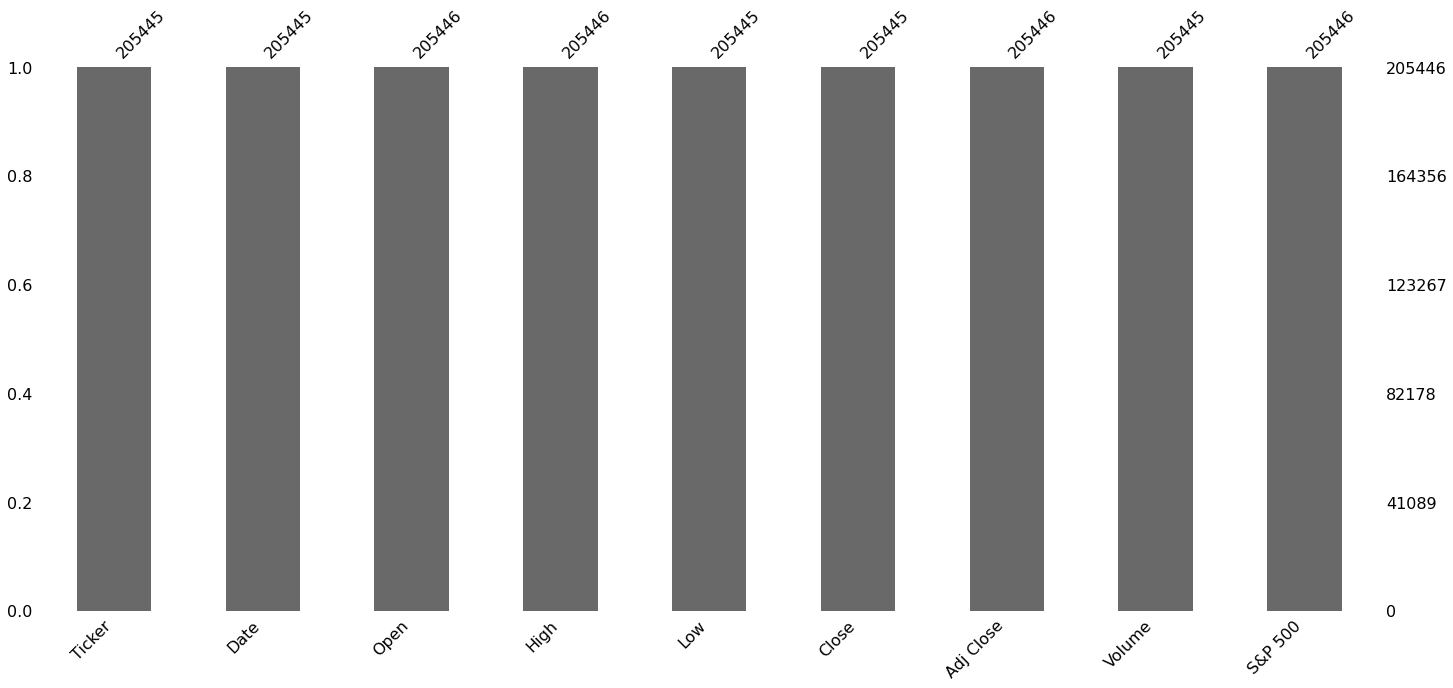

In [51]:
# Visualize missingness pattern
import missingno as msno
msno.bar(df_dirty)
plt.show()

There are many ways to treat missing values. However, in this project, I prefer to drop them because they are made manually.
This method is called the listwise deletion technique.

In [52]:
len(df_dirty)

205446

In [53]:
# Delete all the missing rows of data

df_dirty= df_dirty.dropna()

In [54]:
len(df_dirty)

205441

##### 3.4 Checking duplicated values

In [55]:
# Checcking any duplicates in the dataframe
duplicates=df_dirty.duplicated()
df_dirty[duplicates].sort_values(by='S&P 500')

# Result shows that there are duplicated values as below

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,S&P 500
205422,SPY,10/15/2021,444.750000,446.260010,444.089996,445.869995,445.869995,66226800.0,SPDR S&P 500 Trust
205423,SPY,10/18/2021,443.970001,447.549988,443.269989,447.190002,447.190002,62213200.0,SPDR S&P 500 Trust
205424,SPY,10/19/2021,448.920013,450.709992,448.269989,450.640015,450.640015,46996800.0,SPDR S&P 500 Trust
205425,SPY,10/20/2021,451.130005,452.730011,451.010010,452.410004,452.410004,49571600.0,SPDR S&P 500 Trust
205426,SPY,10/21/2021,451.769989,453.829987,451.309998,453.589996,453.589996,41305400.0,SPDR S&P 500 Trust
205427,SPY,10/22/2021,453.130005,454.670013,451.049988,453.119995,453.119995,58845100.0,SPDR S&P 500 Trust
205428,SPY,10/25/2021,454.279999,455.899994,452.390015,455.549988,455.549988,45214500.0,SPDR S&P 500 Trust
205429,SPY,10/26/2021,457.200012,458.489990,455.559998,455.959992,455.959992,56075100.0,SPDR S&P 500 Trust
205430,SPY,10/27/2021,456.450012,457.160004,453.859985,453.940002,453.940002,72438000.0,SPDR S&P 500 Trust
205431,SPY,10/28/2021,455.459992,458.399994,455.450012,458.320007,458.320007,51437900.0,SPDR S&P 500 Trust


In [56]:
# Get the number of rows ...
len(df_dirty)

205441

In [57]:
# Drop complete duplicates

df_dirty=df_dirty.drop_duplicates()

In [58]:
# Check once more time the number of rows
len(df_dirty)

205430

##### 3.5 Checking any outliers

Outliers are data that is distinctively different from other observations. They could be real outliers or mistakes.

We can use a histogram or box plot to detect outliers.

In [59]:
df_dirty.describe()

,Open,High,Low,Close,Adj Close,Volume
count,205430.000000,205430.000000,205430.000000,205430.000000,205430.000000,2.054300e+05
mean,137.786830,139.613598,135.914784,137.884322,137.236925,4.830329e+06
std,272.529334,275.619926,269.429799,274.364214,272.537681,1.421868e+07
min,0.340000,0.360000,0.330000,0.340000,0.340000,0.000000e+00
25%,35.450001,36.119999,34.782608,35.459999,35.167416,7.334000e+05
50%,73.529999,74.639999,72.407291,73.559998,73.016285,1.672100e+06
75%,153.177494,155.377502,150.869995,153.157501,152.083214,4.174575e+06
max,5320.000000,5332.080078,5242.089844,10097.140000,5313.569824,1.222342e+09


<AxesSubplot:>

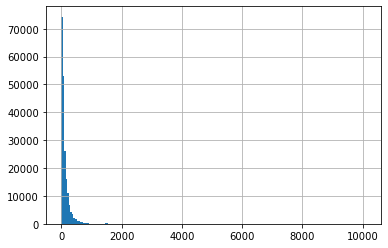

In [60]:
# Make the histogram of feature 'Close'
df_dirty['Close'].hist(bins=200)

The data looks highly skewed with the possible existence of outliers. To study the feature closer, let’s make a box plot:

<AxesSubplot:>

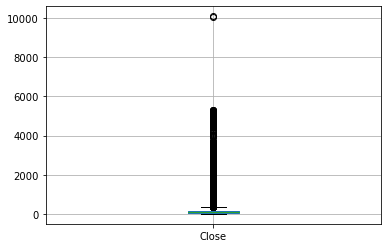

In [61]:
# Make the box plot to have a better look
df_dirty.boxplot(column=['Close'])

In this plot, we can see there is an outlier at a value of over 10000. However, the outliers could be too distinct that the box plot can’t visualize them. Instead, we can look at their descriptive statistics:

In [62]:
df_dirty['Close'].describe()

count    205430.000000
mean        137.884322
std         274.364214
min           0.340000
25%          35.459999
50%          73.559998
75%         153.157501
max       10097.140000
Name: Close, dtype: float64

As we can see that the maximum value is 10097, while the 75% quartile is only 153. The 10097 value is an outlier.

In [63]:
outlier = df_dirty[df_dirty['Close'] > 10000]
outlier

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,S&P 500
0,MMM,12/30/2020,173.880005,174.919998,173.380005,10074.11,168.753479,1419100.0,member
83,MMM,4/30/2021,197.660004,198.990005,196.130005,10097.14,192.649506,2507100.0,member


It highly depends on the dataset and the goal of the project to determine the right solutions to handle outliers. However, in this project, I prefer to drop them because they are made manually. Then, select only 'Close' values smaller than 10000.

In [64]:
df_dirty = df_dirty[df_dirty['Close'] < 10000]
len(df_dirty)

205428

##### 3. 6 Checking data types

Check the type of each columns to ensure the data is cleaned.

In [65]:
# Checking data types of all columns
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205428 entries, 1 to 205445
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Ticker     205428 non-null  object 
 1   Date       205428 non-null  object 
 2   Open       205428 non-null  float64
 3   High       205428 non-null  float64
 4   Low        205428 non-null  float64
 5   Close      205428 non-null  float64
 6   Adj Close  205428 non-null  float64
 7   Volume     205428 non-null  float64
 8   S&P 500    205428 non-null  object 
dtypes: float64(6), object(3)
memory usage: 15.7+ MB


Check column **Date**

In [66]:
# Type of 'Date' is object so convert "Date" into datetime
df_dirty['Date']=pd.to_datetime(df_dirty['Date'])

In [67]:
# Assert that conversion happened
assert df_dirty['Date'].dtype == 'datetime64[ns]'

# No output means it passed

##### 3. 7 Checking data range

In [68]:
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205428 entries, 1 to 205445
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Ticker     205428 non-null  object        
 1   Date       205428 non-null  datetime64[ns]
 2   Open       205428 non-null  float64       
 3   High       205428 non-null  float64       
 4   Low        205428 non-null  float64       
 5   Close      205428 non-null  float64       
 6   Adj Close  205428 non-null  float64       
 7   Volume     205428 non-null  float64       
 8   S&P 500    205428 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 15.7+ MB


In [69]:
df_dirty['Date'].min()

Timestamp('2020-12-30 00:00:00')

In [70]:
df_dirty['Date'].max()

Timestamp('2022-04-13 00:00:00')

Because we only focus on values recorded until the last date of October 2021,
we can drop values after November 2021

In [71]:
# Get values out of time range
df_dirty[df_dirty['Date'] > '2021-10-31']

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,S&P 500
65,MMM,2022-04-06,195.000000,195.610001,193.990005,194.839996,190.401901,1472700.0,member
66,MMM,2022-04-07,194.160004,195.350006,193.919998,194.949997,190.509384,1501500.0,member
67,MMM,2022-04-08,194.419998,196.669998,194.029999,195.720001,191.261841,2391800.0,member
68,MMM,2022-04-09,196.059998,198.960007,196.059998,198.000000,193.489914,2159600.0,member
69,MMM,2022-04-12,198.199997,199.289993,197.059998,197.830002,193.323791,1682100.0,member
70,MMM,2022-04-13,196.009995,197.330002,195.369995,196.470001,191.994766,2259700.0,member


In [72]:
# Drop values using .drop()
df_dirty.drop(df_dirty[df_dirty['Date'] > '2021-10-31'].index, inplace = True)

In [73]:
df_dirty['Date'].max()

Timestamp('2021-10-29 00:00:00')

##### 3.8 Check value inconsistency

In [74]:
# Check value count of categorical variable
df_dirty['S&P 500'].value_counts()

member                106458
non-member             98745
SPDR S&P 500 Trust       211
MEMBER                     3
NON-MEMBER                 3
     member                1
non*member                 1
Name: S&P 500, dtype: int64

There are 6 values of 'S&P 500' are caplitalized so we would like them to be in lowercase.

In [75]:
# Replace letters 'MEMBER' with 'member' and 'NON-MEMBER' with 'non-member'
df_dirty['S&P 500'] = df_dirty['S&P 500'].str.replace("MEMBER","member")


In [76]:
df_dirty['S&P 500'] = df_dirty['S&P 500'].str.replace("NON-member","non-member")

In [77]:
# There is 1 value 'member' with some white spaces in front of it so
# we should strip all spaces
df_dirty['S&P 500'] = df_dirty['S&P 500'].str.strip()

In [78]:
# There is 1 value 'non*member' with "*" instead of "-" so 
# we replace it
df_dirty['S&P 500'] = df_dirty['S&P 500'].str.replace("*","-")

In [79]:
# Check the consistency again
df_dirty['S&P 500'].value_counts()

member                106462
non-member             98749
SPDR S&P 500 Trust       211
Name: S&P 500, dtype: int64

In [80]:
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205422 entries, 1 to 205445
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Ticker     205422 non-null  object        
 1   Date       205422 non-null  datetime64[ns]
 2   Open       205422 non-null  float64       
 3   High       205422 non-null  float64       
 4   Low        205422 non-null  float64       
 5   Close      205422 non-null  float64       
 6   Adj Close  205422 non-null  float64       
 7   Volume     205422 non-null  float64       
 8   S&P 500    205422 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 15.7+ MB


In [81]:
df_stock_data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,S&P 500
0,MMM,2020-12-30,173.880005,174.919998,173.380005,174.110001,168.753479,1419100,member
1,MMM,2020-12-31,174.119995,174.869995,173.179993,174.789993,169.412537,1841300,member
2,MMM,2021-01-04,175.000000,176.199997,170.550003,171.869995,166.582382,2996200,member
3,MMM,2021-01-05,172.009995,173.250000,170.649994,171.580002,166.301315,2295300,member
4,MMM,2021-01-06,172.720001,175.570007,172.039993,174.190002,168.831024,3346400,member


##### Save the cleaned file as an csv file for futher steps:

In [82]:
# Write the cleaned data into a csv file:

df_dirty.to_csv("../Tran_Dao_Data/Tran_Dao_StudC_stock_data_stage.csv", index = False)

### 4. Combine the data of student C with the data provided by student A

To proceed for answering the research questions, a merged “master” file is created by combining the data of student C (*Tran_Dao_StudC_stock_data_stage.csv*) and student A(*Biber_Martin_StudentA_tickers_sp500_stage.csv* and *Biber_Martin_StudentA_sp500_ESG_stage*). 

First and foremost, the data of student C and student A are combined to answer initial parts of the question. Student A provided 2 datasets including: 
- Data about sectors of stocks
- Data about ESG scores of stocks

In [83]:
# Read the stage dataset of student C
df = pd.read_csv("../Tran_Dao_Data/Tran_Dao_StudC_stock_data_stage.csv")
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,S&P 500
0,MMM,2020-12-31,174.119995,174.869995,173.179993,174.789993,169.412537,1841300.0,member
1,MMM,2021-01-04,175.000000,176.199997,170.550003,171.869995,166.582382,2996200.0,member
2,MMM,2021-01-05,172.009995,173.250000,170.649994,171.580002,166.301315,2295300.0,member
3,MMM,2021-01-06,172.720001,175.570007,172.039993,174.190002,168.831024,3346400.0,member
4,MMM,2021-01-07,171.559998,173.460007,166.160004,169.720001,164.498520,5863400.0,member


In [84]:
len(df.Ticker.unique())

996

In [85]:
# Read the dataset about sectors provided by student A
sp500_sector=pd.read_csv("../Tran_Dao_Data/Biber_Martin_StudentA_tickers_sp500_stage.csv")
sp500_sector.head()

,Symbol,Security,Sector,Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment
2,ABBV,AbbVie,Health Care,Pharmaceuticals
3,ABMD,Abiomed,Health Care,Health Care Equipment
4,ACN,Accenture,Information Technology,IT Consulting & Other Services


In [86]:
# Rename 'Symbol' column into 'Ticker'
sp500_sector.rename(columns = {"Symbol":"Ticker"}, inplace = True)

In [87]:
len(sp500_sector.Ticker.unique())

505

In [88]:
# Read the dataset that contains ESG scores provided by student A
sp500_esg=pd.read_csv("../Tran_Dao_Data/Biber_Martin_StudentA_sp500_ESG_stage.csv")
sp500_esg.head()

,Symbol,Security,sector,industry,Sub-Industry,homepage,ESGtotal,ENVRisk,SocialRisk,GovRisk
0,MMM,3M,Industrials,Conglomerates,Industrial Conglomerates,http://www.3m.com,35.0,13.2,13.2,13.2
1,ABT,Abbott Laboratories,Healthcare,Medical Devices,Health Care Equipment,http://www.abbott.com,26.0,3.0,3.0,3.0
2,ABBV,AbbVie,Healthcare,Drug Manufacturers—General,Pharmaceuticals,http://www.abbvie.com,27.0,0.6,0.6,0.6
3,ABMD,Abiomed,Healthcare,Medical Devices,Health Care Equipment,http://www.abiomed.com,NaN,NaN,NaN,NaN
4,ACN,Accenture,Technology,Information Technology Services,IT Consulting & Other Services,http://www.accenture.com,11.0,0.6,0.6,0.6


In [89]:
# Rename the column "Symbol"
sp500_esg.rename(columns = {"Symbol":"Ticker"}, inplace = True)

In [90]:
len(sp500_esg.Ticker.unique())

505

Merge the 3 dataframes "df", "sp500_sector","sp500_esg" together by using the column 'Ticker' as a key:

In [91]:
mergedf1=df.merge(sp500_sector, how='left')
display(mergedf1)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,S&P 500,Security,Sector,Sub-Industry
0,MMM,2020-12-31,174.119995,174.869995,173.179993,174.789993,169.412537,1841300.0,member,3M,Industrials,Industrial Conglomerates
1,MMM,2021-01-04,175.000000,176.199997,170.550003,171.869995,166.582382,2996200.0,member,3M,Industrials,Industrial Conglomerates
2,MMM,2021-01-05,172.009995,173.250000,170.649994,171.580002,166.301315,2295300.0,member,3M,Industrials,Industrial Conglomerates
3,MMM,2021-01-06,172.720001,175.570007,172.039993,174.190002,168.831024,3346400.0,member,3M,Industrials,Industrial Conglomerates
4,MMM,2021-01-07,171.559998,173.460007,166.160004,169.720001,164.498520,5863400.0,member,3M,Industrials,Industrial Conglomerates
...,...,...,...,...,...,...,...,...,...,...,...,...
205417,MMM,2021-04-12,198.199997,199.289993,197.059998,197.830002,193.323791,1682100.0,member,3M,Industrials,Industrial Conglomerates
205418,MMM,2021-04-13,196.009995,197.330002,195.369995,196.470001,191.994766,2259700.0,member,3M,Industrials,Industrial Conglomerates
205419,MMM,2021-04-30,197.660004,198.990005,196.130005,197.139999,192.649506,2507100.0,member,3M,Industrials,Industrial Conglomerates
205420,MMM,2021-08-12,201.479996,202.369995,200.360001,201.429993,198.290299,1231800.0,member,3M,Industrials,Industrial Conglomerates


In [92]:
mergedf2=mergedf1.merge(sp500_esg, how='left')
display(mergedf2)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,S&P 500,Security,Sector,Sub-Industry,sector,industry,homepage,ESGtotal,ENVRisk,SocialRisk,GovRisk
0,MMM,2020-12-31,174.119995,174.869995,173.179993,174.789993,169.412537,1841300.0,member,3M,Industrials,Industrial Conglomerates,Industrials,Conglomerates,http://www.3m.com,35.0,13.2,13.2,13.2
1,MMM,2021-01-04,175.000000,176.199997,170.550003,171.869995,166.582382,2996200.0,member,3M,Industrials,Industrial Conglomerates,Industrials,Conglomerates,http://www.3m.com,35.0,13.2,13.2,13.2
2,MMM,2021-01-05,172.009995,173.250000,170.649994,171.580002,166.301315,2295300.0,member,3M,Industrials,Industrial Conglomerates,Industrials,Conglomerates,http://www.3m.com,35.0,13.2,13.2,13.2
3,MMM,2021-01-06,172.720001,175.570007,172.039993,174.190002,168.831024,3346400.0,member,3M,Industrials,Industrial Conglomerates,Industrials,Conglomerates,http://www.3m.com,35.0,13.2,13.2,13.2
4,MMM,2021-01-07,171.559998,173.460007,166.160004,169.720001,164.498520,5863400.0,member,3M,Industrials,Industrial Conglomerates,Industrials,Conglomerates,http://www.3m.com,35.0,13.2,13.2,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205417,MMM,2021-04-12,198.199997,199.289993,197.059998,197.830002,193.323791,1682100.0,member,3M,Industrials,Industrial Conglomerates,Industrials,Conglomerates,http://www.3m.com,35.0,13.2,13.2,13.2
205418,MMM,2021-04-13,196.009995,197.330002,195.369995,196.470001,191.994766,2259700.0,member,3M,Industrials,Industrial Conglomerates,Industrials,Conglomerates,http://www.3m.com,35.0,13.2,13.2,13.2
205419,MMM,2021-04-30,197.660004,198.990005,196.130005,197.139999,192.649506,2507100.0,member,3M,Industrials,Industrial Conglomerates,Industrials,Conglomerates,http://www.3m.com,35.0,13.2,13.2,13.2
205420,MMM,2021-08-12,201.479996,202.369995,200.360001,201.429993,198.290299,1231800.0,member,3M,Industrials,Industrial Conglomerates,Industrials,Conglomerates,http://www.3m.com,35.0,13.2,13.2,13.2


The result of the merge is a new dataframe called "mergedf2" that combines the information from the three inputs. 

In [93]:
mergedf2.shape

(205422, 19)

In [94]:
mergedf2.columns

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'S&P 500', 'Security', 'Sector', 'Sub-Industry', 'sector', 'industry',
       'homepage', 'ESGtotal', 'ENVRisk', 'SocialRisk', 'GovRisk'],
      dtype='object')

In [95]:
# Rename several columns

mergedf2.rename(columns = {"ESGtotal":"ESG Score", "industry":"Industry", "homepage":"Homepage"},inplace = True)

In [96]:
mergedf2.columns

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'S&P 500', 'Security', 'Sector', 'Sub-Industry', 'sector', 'Industry',
       'Homepage', 'ESG Score', 'ENVRisk', 'SocialRisk', 'GovRisk'],
      dtype='object')

In [97]:
mergedf2.Sector.unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy', nan], dtype=object)

In [98]:
mergedf2.sector.unique()

array(['Industrials', 'Healthcare', 'Technology',
       'Communication Services', 'Consumer Cyclical', 'Utilities',
       'Financial Services', 'Basic Materials', 'Real Estate',
       'Consumer Defensive', 'Energy', nan], dtype=object)

In [99]:
del mergedf2['sector']

In [100]:
len(mergedf2.Ticker.unique())

996

In [101]:
mergedf2['S&P 500'].value_counts()

member                106462
non-member             98749
SPDR S&P 500 Trust       211
Name: S&P 500, dtype: int64

In [102]:
# Checking missing values
mergedf2.isna().sum()

# Non-members of S&P 500 have no values of ESG Score or other indexes.

Ticker               0
Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
S&P 500              0
Security         98960
Sector           98960
Sub-Industry     98960
Industry         98960
Homepage         98960
ESG Score       110472
ENVRisk         110472
SocialRisk      110472
GovRisk         110472
dtype: int64

In [103]:
# Write the combined data as a csv:

mergedf2.to_csv("../Tran_Dao_Data/Tran_Dao_StudC_combined_stock_data_stage.csv",index = False)

In [104]:
mergedf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205422 entries, 0 to 205421
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Ticker        205422 non-null  object 
 1   Date          205422 non-null  object 
 2   Open          205422 non-null  float64
 3   High          205422 non-null  float64
 4   Low           205422 non-null  float64
 5   Close         205422 non-null  float64
 6   Adj Close     205422 non-null  float64
 7   Volume        205422 non-null  float64
 8   S&P 500       205422 non-null  object 
 9   Security      106462 non-null  object 
 10  Sector        106462 non-null  object 
 11  Sub-Industry  106462 non-null  object 
 12  Industry      106462 non-null  object 
 13  Homepage      106462 non-null  object 
 14  ESG Score     94950 non-null   float64
 15  ENVRisk       94950 non-null   float64
 16  SocialRisk    94950 non-null   float64
 17  GovRisk       94950 non-null   float64
dtypes: f